/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Training with SGD:
Epoch 1/50, Loss: 1.1488
Epoch 2/50, Loss: 1.0818
Epoch 3/50, Loss: 1.0581
Epoch 4/50, Loss: 1.0423
Epoch 5/50, Loss: 1.0336
Epoch 6/50, Loss: 1.0269
Epoch 7/50, Loss: 1.0226
Epoch 8/50, Loss: 1.0175
Epoch 9/50, Loss: 1.0148
Epoch 10/50, Loss: 1.0107
Epoch 11/50, Loss: 1.0090
Epoch 12/50, Loss: 1.0059
Epoch 13/50, Loss: 1.0028
Epoch 14/50, Loss: 1.0016
Epoch 15/50, Loss: 1.0014
Epoch 16/50, Loss: 0.9981
Epoch 17/50, Loss: 0.9974
Epoch 18/50, Loss: 0.9928
Epoch 19/50, Loss: 0.9949
Epoch 20/50, Loss: 0.9927
Epoch 21/50, Loss: 0.9911
Epoch 22/50, Loss: 0.9906
Epoch 23/50, Loss: 0.9884
Epoch 24/50, Loss: 0.9885
Epoch 25/50, Loss: 0.9865
Epoch 26/50, Loss: 0.9854
Epoch 27/50, Loss: 0.9858
Epoch 28/50, Loss: 0.9825
Epoch 29/50, Loss: 0.9809
Epoch 30/50, Loss: 0.9818
Epoch 31/50, Loss: 0.9790
Epoch 32/50, Loss: 0.9796
Epoch 33/50, Loss: 0.9774
Epoch 34/50, Loss: 0.9770
Epoch 35/50, Loss: 0.9760
Epoch 36/50, Loss: 0.9755
Epoch 37/50, Loss: 0.9754
Epoch 38/50, Loss: 0.9735
E

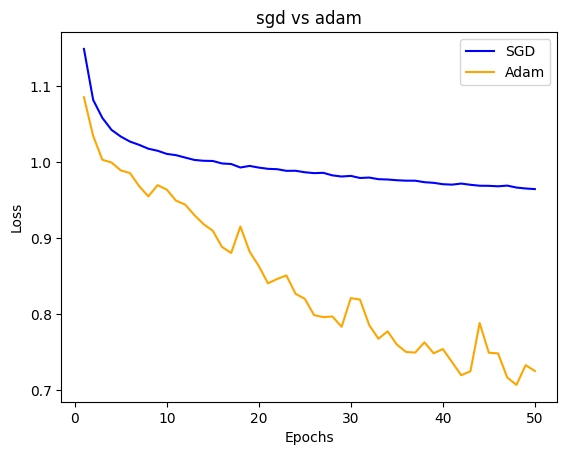

In [ ]:
#Design a deep NN, optimize the network with Gradient Descent, and optimize the same with Stochastic gradient descent(SGD).
import tensorflow as tf
from tensorflow.keras import layers,models,optimizers
import numpy as np
import matplotlib.pyplot as plt

def create_data():
  X=np.random.randn(1000,10)
  y=np.random.randn(1000,1)
  return X,y

def create_model():
  model=models.Sequential([
      layers.Dense(10,activation="relu",input_shape=(10,)),
      layers.Dense(20,activation="relu"),
      layers.Dense(1)
  ])
  return model

def train_model_with_history(model,optimizer,X,y,batch_size,epochs,optimizer_name):
  model.compile(optimizer=optimizer,loss='mean_squared_error')
  history=[]
  for epoch in range(epochs):
    hist=model.fit(X,y,batch_size=batch_size,epochs=1,verbose=0)
    loss=hist.history['loss'][0]
    history.append(loss)
    print(f"Epoch {epoch+1}/{epochs}, Loss: {loss:.4f}")
  return history

X,y=create_data()
model_sgd=create_model()
model_adam=create_model()

optimizer_sgd=optimizers.SGD(learning_rate=0.01)
optimizer_adam=optimizers.Adam(learning_rate=0.01)
epochs=50
batch_size=32

print("\nTraining with SGD:")
loss_sgd=train_model_with_history(model_sgd,optimizer_sgd,X,y,batch_size,epochs,"SGD")
accuracy_sgd=train_model_with_history(model_sgd,optimizer_sgd,X,y,batch_size,epochs,"SGD")
print("\nTraining with Adam:")
loss_adam=train_model_with_history(model_adam,optimizer_adam,X,y,batch_size,epochs,"Adam")
plt.plot(range(1,epochs+1), loss_sgd, label ='SGD', color ='blue')
plt.plot(range(1,epochs+1), loss_adam, label ='Adam', color ='orange')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('sgd vs adam')
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8914 - loss: 0.3462 - val_accuracy: 0.9801 - val_loss: 0.0613
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9848 - loss: 0.0501 - val_accuracy: 0.9867 - val_loss: 0.0384
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9906 - loss: 0.0309 - val_accuracy: 0.9901 - val_loss: 0.0333
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9926 - loss: 0.0244 - val_accuracy: 0.9898 - val_loss: 0.0345
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9945 - loss: 0.0185 - val_accuracy: 0.9911 - val_loss: 0.0282
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9949 - loss: 0.0149 - val_accuracy: 0.9916 - val_loss: 0.0292
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9962 - loss: 0.0126 - val_accuracy: 0.9914 - val_loss: 0.0304
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9965 - loss: 0.0115 -

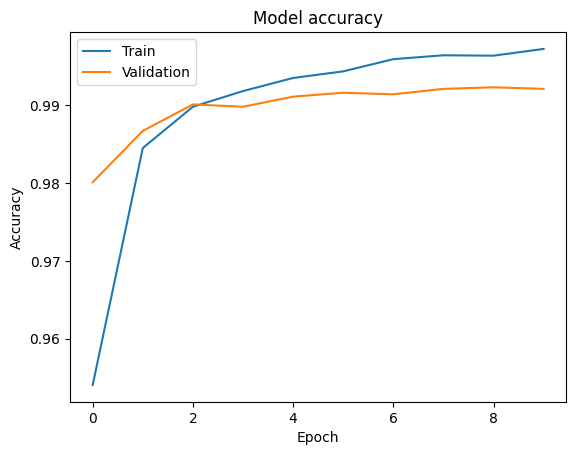

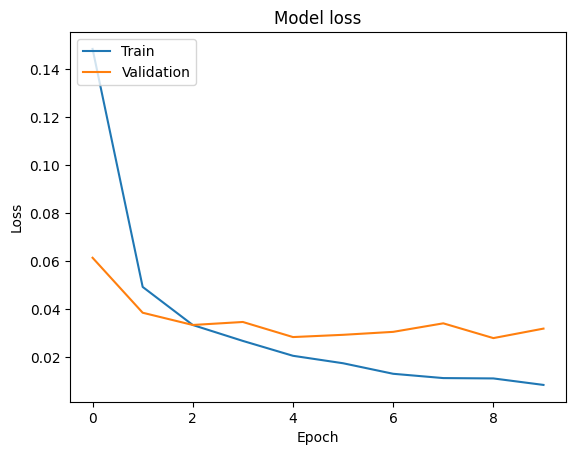

In [ ]:
#Classification of MNIST Dataset using CNN.
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
#load and preprocess the mnist dataset
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data( )
train_images= train_images.reshape((train_images.shape[0], 28, 28, 1)).astype('float32') / 255.0
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1)).astype('float32') / 255
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


Training with SGD:

Training with Adam:


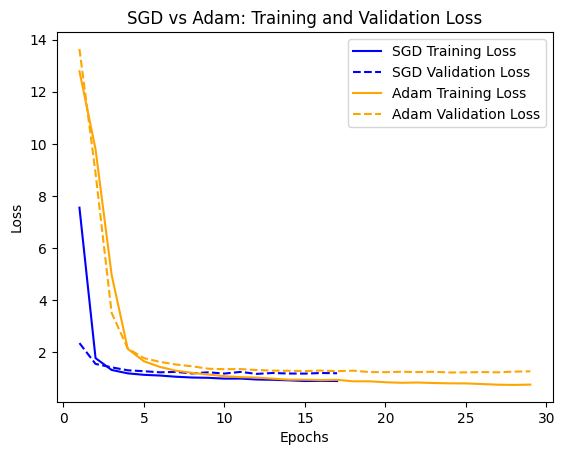

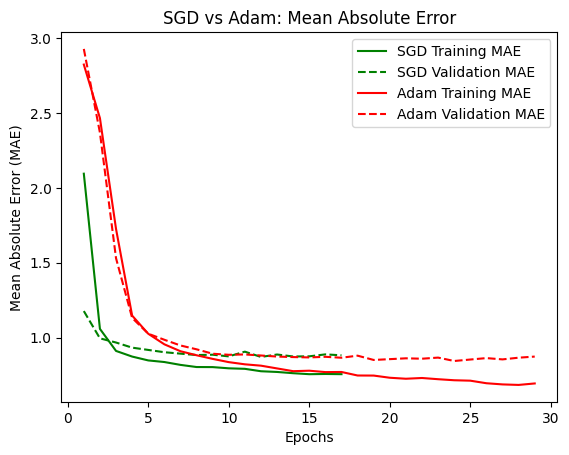

In [ ]:
# traning validation loss and mean absolute error(modification of 2)
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers, callbacks
import numpy as np
import matplotlib.pyplot as plt

# Data generation
def create_data():
    X = np.random.randn(1000, 10)
    y = 2 * X[:, 0] + 3 * X[:, 1] + np.random.randn(1000)  # Linear relation with noise
    return X, y

# Model architecture
def create_model():
    model = models.Sequential([
        layers.Dense(32, activation="relu", input_shape=(10,)),
        layers.Dense(64, activation="relu"),
        layers.Dense(32, activation="relu"),
        layers.Dense(1)
    ])
    return model

# Function to train model and return history
def train_model_with_history(model, optimizer, X, y, batch_size, epochs, validation_split):
    model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae'])
    early_stop = callbacks.EarlyStopping(monitor='val_loss', patience=5)  # Early stopping
    history = model.fit(X, y, batch_size=batch_size, epochs=epochs, validation_split=validation_split, verbose=0, callbacks=[early_stop])
    return history

# Create data
X, y = create_data()

# Model creation for both optimizers
model_sgd = create_model()
model_adam = create_model()

# Optimizers with different learning rates
optimizer_sgd = optimizers.SGD(learning_rate=0.01)
optimizer_adam = optimizers.Adam(learning_rate=0.001)

# Training parameters
epochs = 50
batch_size = 32
validation_split = 0.2  # Use 20% for validation

# Train with SGD
print("\nTraining with SGD:")
history_sgd = train_model_with_history(model_sgd, optimizer_sgd, X, y, batch_size, epochs, validation_split)

# Train with Adam
print("\nTraining with Adam:")
history_adam = train_model_with_history(model_adam, optimizer_adam, X, y, batch_size, epochs, validation_split)

# Plot Training vs Validation Loss for SGD and Adam
plt.plot(range(1, len(history_sgd.history['loss']) + 1), history_sgd.history['loss'], label='SGD Training Loss', color='blue')
plt.plot(range(1, len(history_sgd.history['val_loss']) + 1), history_sgd.history['val_loss'], label='SGD Validation Loss', color='blue', linestyle='dashed')

plt.plot(range(1, len(history_adam.history['loss']) + 1), history_adam.history['loss'], label='Adam Training Loss', color='orange')
plt.plot(range(1, len(history_adam.history['val_loss']) + 1), history_adam.history['val_loss'], label='Adam Validation Loss', color='orange', linestyle='dashed')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('SGD vs Adam: Training and Validation Loss')
plt.legend()
plt.show()

# Plot Mean Absolute Error (MAE) for SGD and Adam
plt.plot(range(1, len(history_sgd.history['mae']) + 1), history_sgd.history['mae'], label='SGD Training MAE', color='green')
plt.plot(range(1, len(history_sgd.history['val_mae']) + 1), history_sgd.history['val_mae'], label='SGD Validation MAE', color='green', linestyle='dashed')

plt.plot(range(1, len(history_adam.history['mae']) + 1), history_adam.history['mae'], label='Adam Training MAE', color='red')
plt.plot(range(1, len(history_adam.history['val_mae']) + 1), history_adam.history['val_mae'], label='Adam Validation MAE', color='red', linestyle='dashed')

plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('SGD vs Adam: Mean Absolute Error')
plt.legend()
plt.show()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 8ms/step - accuracy: 0.3936 - loss: 1.6929 - val_accuracy: 0.8927 - val_loss: 0.3220
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 6ms/step - accuracy: 0.7481 - loss: 0.8015 - val_accuracy: 0.9080 - val_loss: 0.2872
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.8061 - loss: 0.6261 - val_accuracy: 0.9301 - val_loss: 0.2114
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.8290 - loss: 0.5506 - val_accuracy: 0.9220 - val_loss: 0.2519
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.8448 - loss: 0.5068 - val_accuracy: 0.9426 - val_loss: 0.1976
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.8559 - loss: 0.4793 - val_accuracy: 0.9392 - val_loss: 0.1980
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8642 - loss: 0.4445 - val_accuracy: 0.9415 - val_loss: 0.1900
Epoch 8/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.8693 - loss: 0

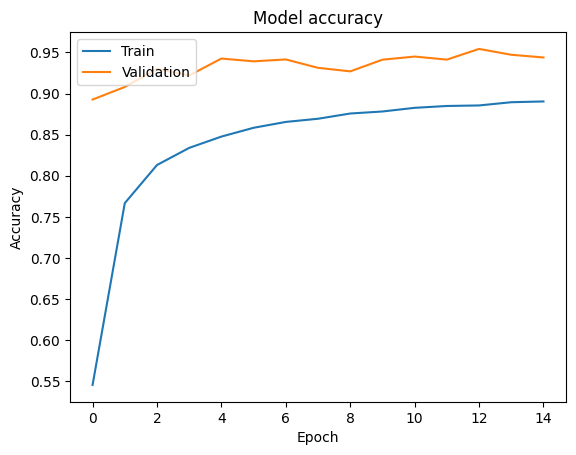

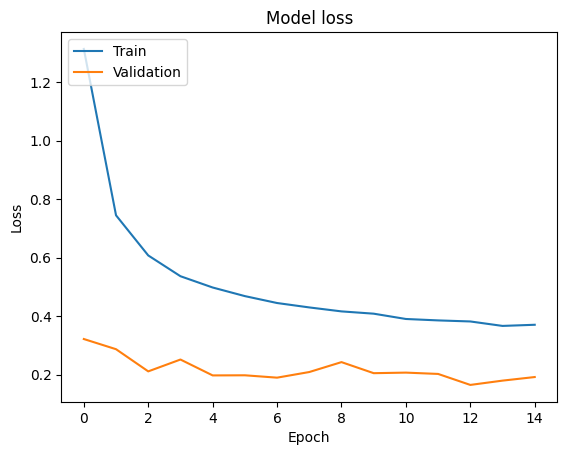

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# Load and preprocess the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

# Reshaping and normalizing the images
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1)).astype('float32') / 255.0
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1)).astype('float32') / 255.0

# Data Augmentation
data_augmentation = tf.keras.Sequential([
    layers.RandomRotation(0.2),
    layers.RandomTranslation(0.2, 0.2),
    layers.RandomZoom(0.2)
])

# Define the model
model = models.Sequential()

# Add data augmentation layer
model.add(data_augmentation)

# Add convolutional and pooling layers
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))  # Adding a third Conv layer
model.add(layers.MaxPooling2D((2, 2)))

# Add Flatten and Dense layers
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))  # Adding dropout for regularization
model.add(layers.Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=15, validation_data=(test_images, test_labels))

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

# Plotting Accuracy and Loss
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
